# Day 08. Exercise 05
# Clustering

## 0. Imports

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [3]:
df = pd.read_csv("../data/regression.csv")

In [4]:

df = df.drop(columns=["pageviews", "uid"])

## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [10]:
kmeans = KMeans(n_clusters=3, random_state=21)
df['cluster'] = kmeans.fit_predict(df)

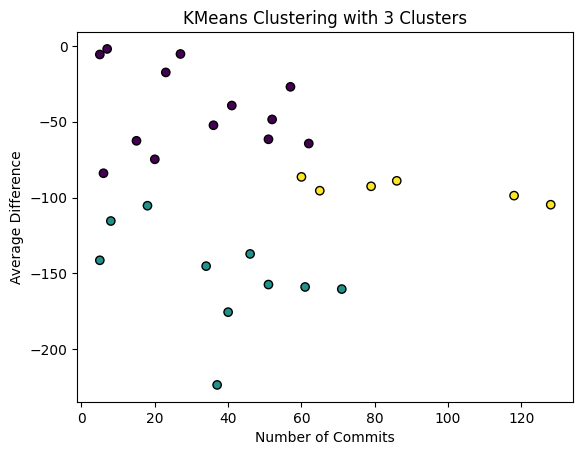

In [6]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['cluster'], cmap='viridis', edgecolors='k')
plt.xlabel("Number of Commits")
plt.ylabel("Average Difference")
plt.title("KMeans Clustering with 3 Clusters")
plt.show()

In [11]:
silhouette_score(df.iloc[:, :-1], df['cluster'])

np.float64(0.4454402135233297)

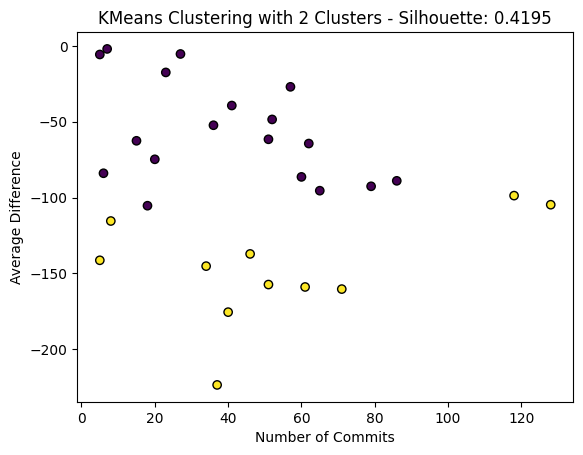

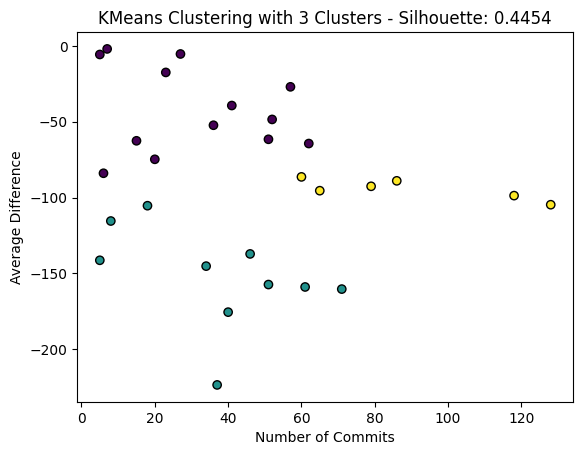

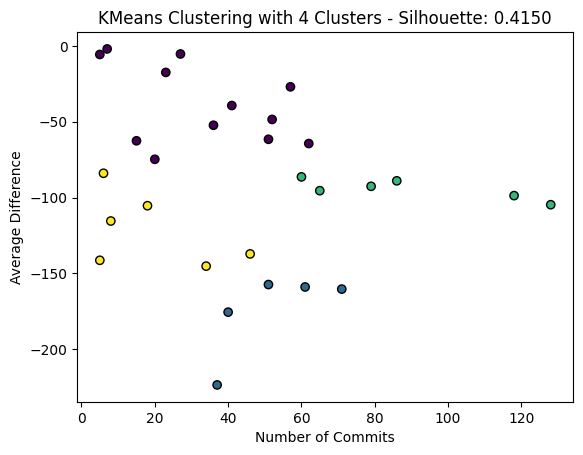

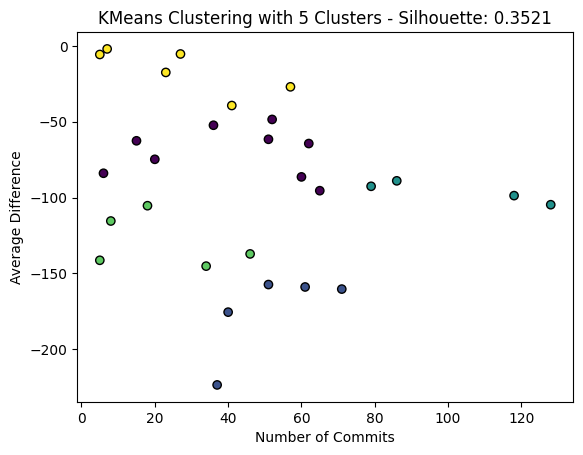

In [13]:
for n in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=n, random_state=21)
    df['cluster'] = kmeans.fit_predict(df.iloc[:, :-1])
    sil_score = silhouette_score(df.iloc[:, :-1], df['cluster'])
    
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['cluster'], cmap='viridis', edgecolors='k')
    plt.xlabel("Number of Commits")
    plt.ylabel("Average Difference")
    plt.title(f"KMeans Clustering with {n} Clusters - Silhouette: {sil_score:.4f}")
    plt.show()

## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [16]:
dbscan = DBSCAN(eps=20, min_samples=2)
df['cluster'] = dbscan.fit_predict(df)

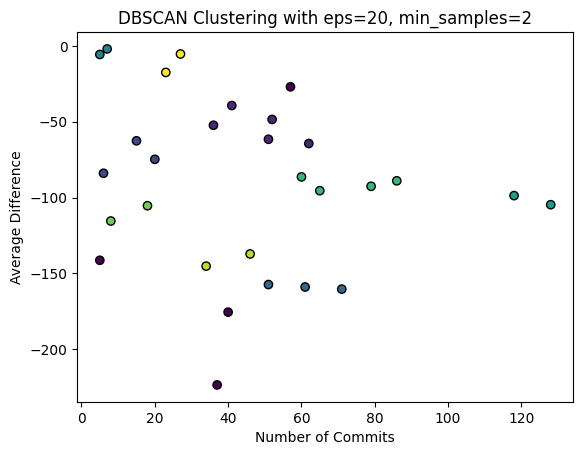

In [17]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['cluster'], cmap='viridis', edgecolors='k')
plt.xlabel("Number of Commits")
plt.ylabel("Average Difference")
plt.title("DBSCAN Clustering with eps=20, min_samples=2")
plt.show()


In [18]:
df_valid = df[df['cluster'] != -1]
silhouette_score(df_valid.iloc[:, :-1], df_valid['cluster'])

np.float64(0.5441859666389783)

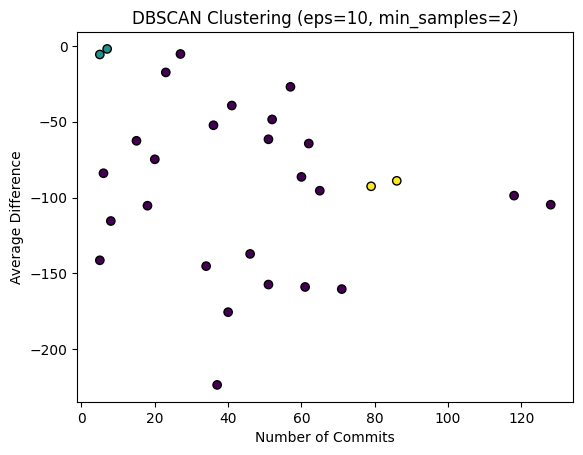

Silhouette Score for eps=10, min_samples=2: 0.9480


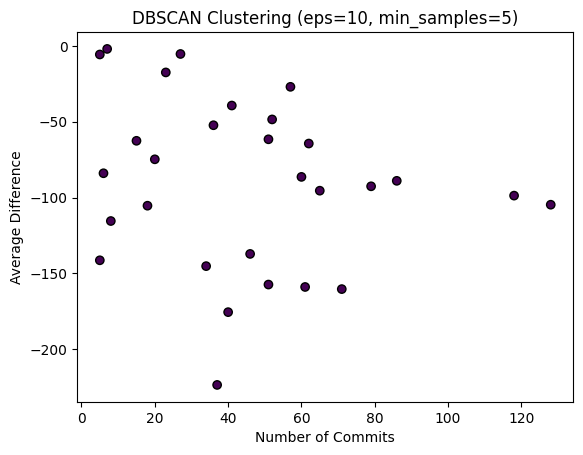

Silhouette Score for eps=10, min_samples=5: 0 valid cluster found. Skipping score calculation.


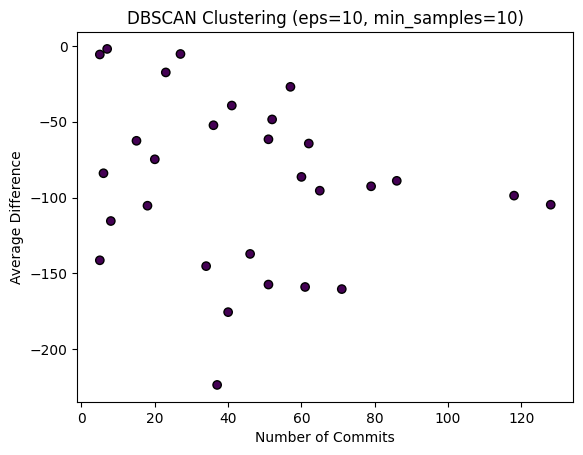

Silhouette Score for eps=10, min_samples=10: 0 valid cluster found. Skipping score calculation.


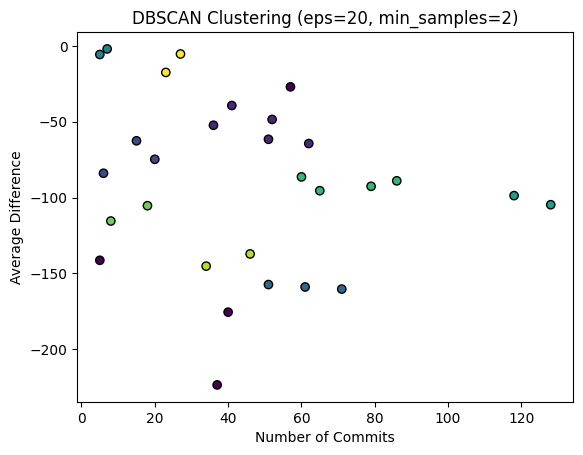

Silhouette Score for eps=20, min_samples=2: 0.5442


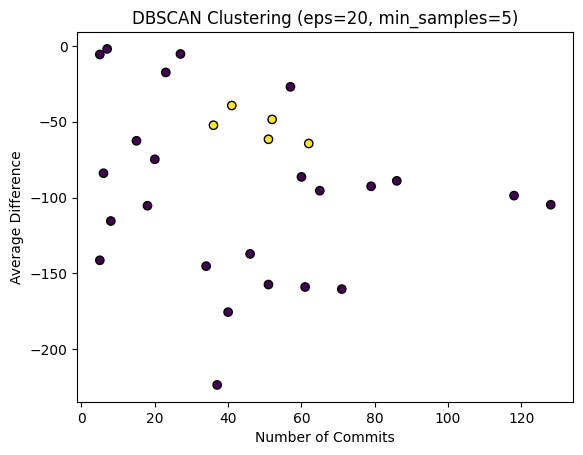

Silhouette Score for eps=20, min_samples=5: 1 valid cluster found. Skipping score calculation.


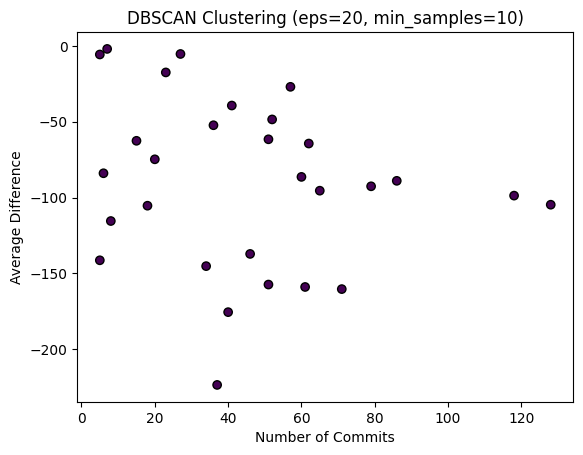

Silhouette Score for eps=20, min_samples=10: 0 valid cluster found. Skipping score calculation.


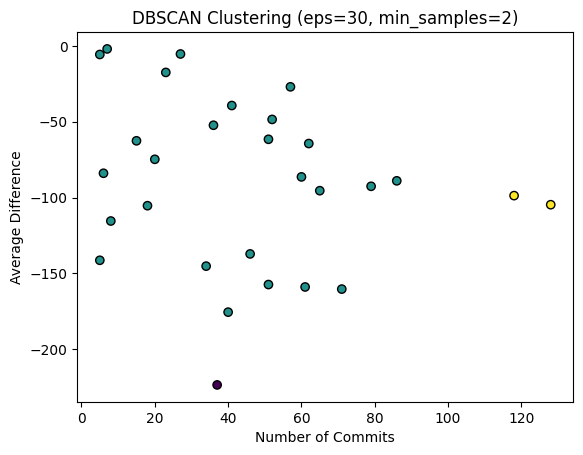

Silhouette Score for eps=30, min_samples=2: 0.2648


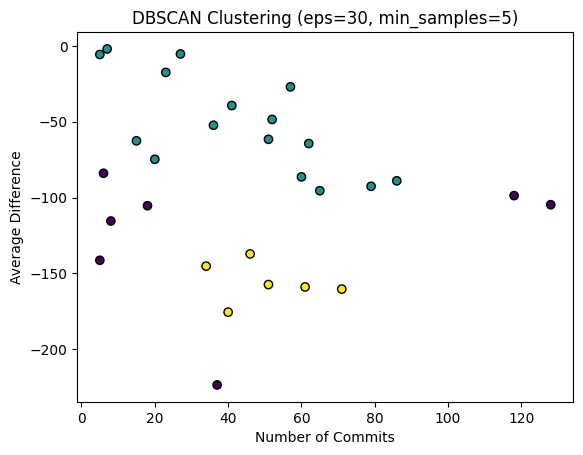

Silhouette Score for eps=30, min_samples=5: 0.5610


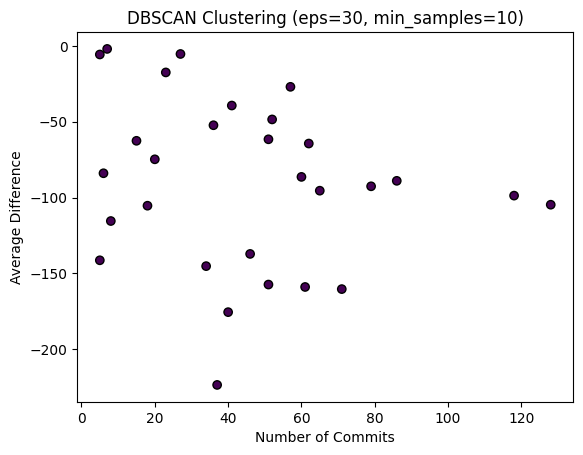

Silhouette Score for eps=30, min_samples=10: 0 valid cluster found. Skipping score calculation.


In [23]:
eps_values = [10, 20, 30]
min_samples_values = [2, 5, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        df['cluster'] = dbscan.fit_predict(df)

        plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['cluster'], cmap='viridis', edgecolors='k')
        plt.xlabel("Number of Commits")
        plt.ylabel("Average Difference")
        plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})")
        plt.show()

        n_clusters = len(set(df['cluster']) - {-1})
        
        if n_clusters > 1:
            df_valid = df[df['cluster'] != -1]
            sil_score = silhouette_score(df_valid.iloc[:, :-1], df_valid['cluster'])
            print(f"Silhouette Score for eps={eps}, min_samples={min_samples}: {sil_score:.4f}")
        else:
            print(f"Silhouette Score for eps={eps}, min_samples={min_samples}: {n_clusters} valid cluster found. Skipping score calculation.")

## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

In [32]:
agg_clust = AgglomerativeClustering(n_clusters=5, linkage='complete')
df['cluster'] = agg_clust.fit_predict(df)

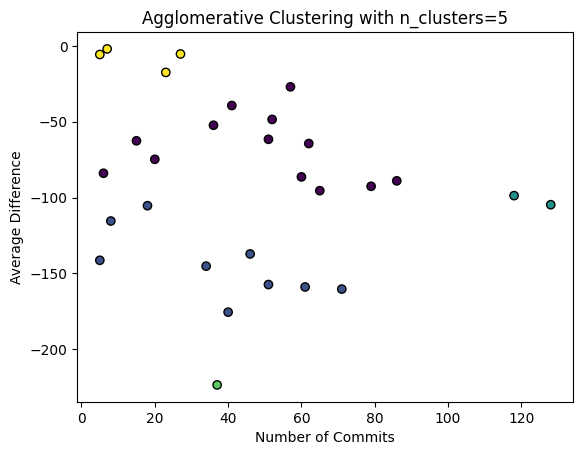

In [28]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['cluster'], cmap='viridis', edgecolors='k')
plt.xlabel("Number of Commits")
plt.ylabel("Average Difference")
plt.title("Agglomerative Clustering with n_clusters=5")
plt.show()

In [29]:
silhouette_score(df.iloc[:, :-1], df['cluster'])

np.float64(0.3818105427392738)

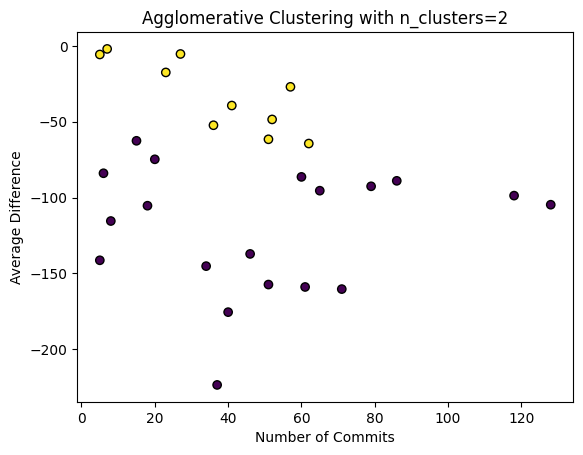

Silhouette Score for n_clusters=2: 0.3590


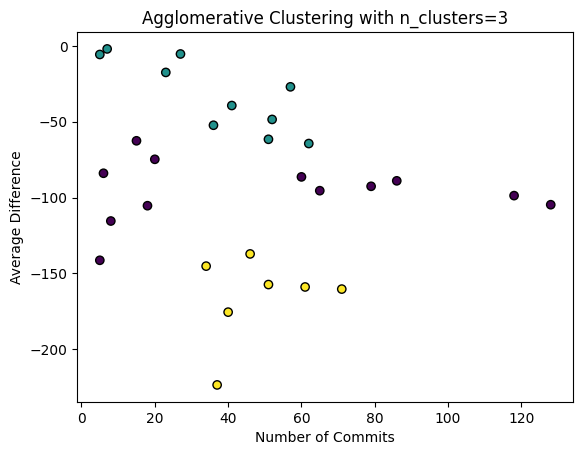

Silhouette Score for n_clusters=3: 0.3390


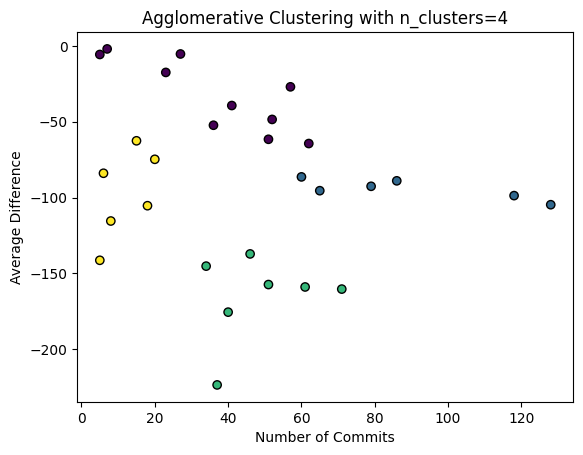

Silhouette Score for n_clusters=4: 0.4448


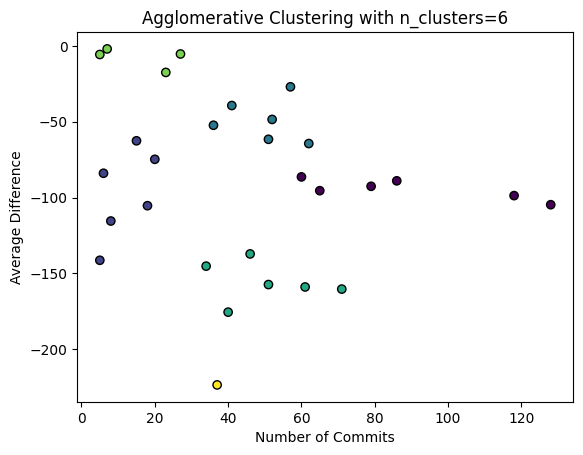

Silhouette Score for n_clusters=6: 0.4527


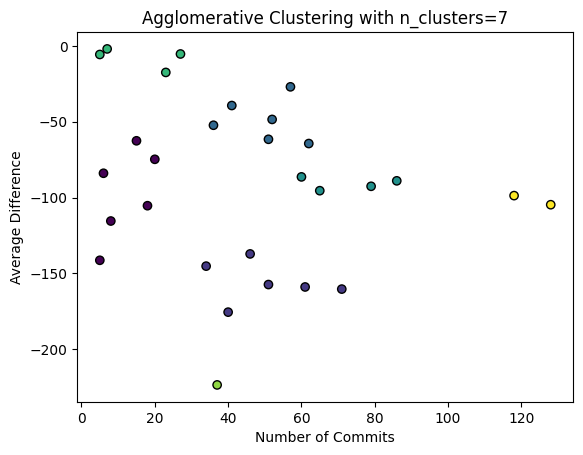

Silhouette Score for n_clusters=7: 0.4866


In [30]:
n_clusters_values = [2, 3, 4, 6, 7]

for n_clusters in n_clusters_values:
    agg_clust = AgglomerativeClustering(n_clusters=n_clusters)
    df['cluster'] = agg_clust.fit_predict(df)
    
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['cluster'], cmap='viridis', edgecolors='k')
    plt.xlabel("Number of Commits")
    plt.ylabel("Average Difference")
    plt.title(f"Agglomerative Clustering with n_clusters={n_clusters}")
    plt.show()

    sil_score = silhouette_score(df.iloc[:, :-1], df['cluster'])
    print(f"Silhouette Score for n_clusters={n_clusters}: {sil_score:.4f}")

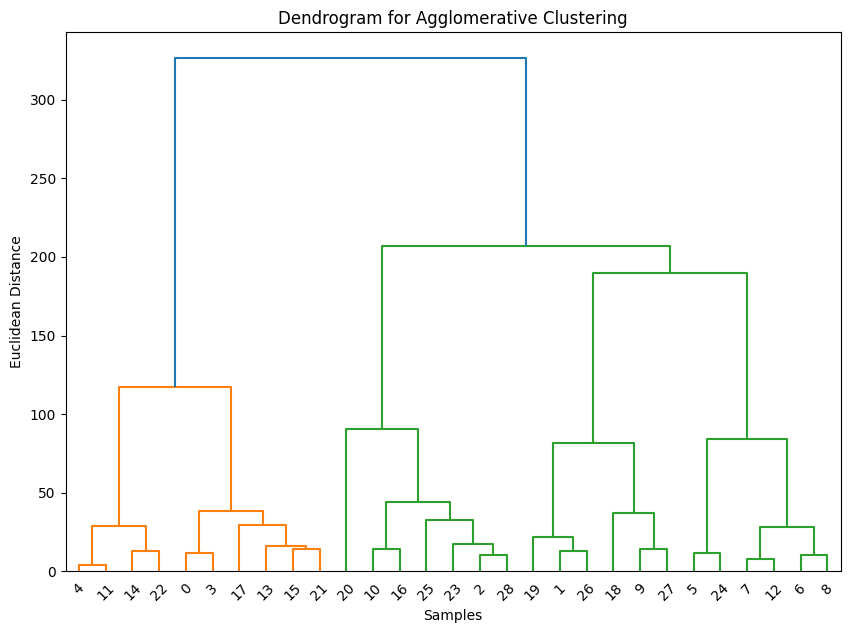

In [33]:
Z = linkage(df.iloc[:, :-1], 'ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [14]:
def optimize_param(model, model_params, param_name, param_range, X):
    scores = []
    best_score = -1
    best_param = None
    for param in param_range:
        model_params[param_name] = param
        model_inst = model(**model_params)
        labels = model_inst.fit_predict(X)
        score = silhouette_score(X, labels)
        scores.append(score)
        if score > best_score:
            best_score = score
            best_param = param
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    ax[0].plot(param_range, scores)
    ax[0].set_title('Silhouette Score vs Parameter')
    model_params[param_name] = best_param
    best_model = model(**model_params)
    labels = best_model.fit_predict(X)
    ax[1].scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
    ax[1].set_title(f'Clustering with {param_name} = {best_param}')
    plt.show()
    return best_param, best_score

Optimizing KMeans


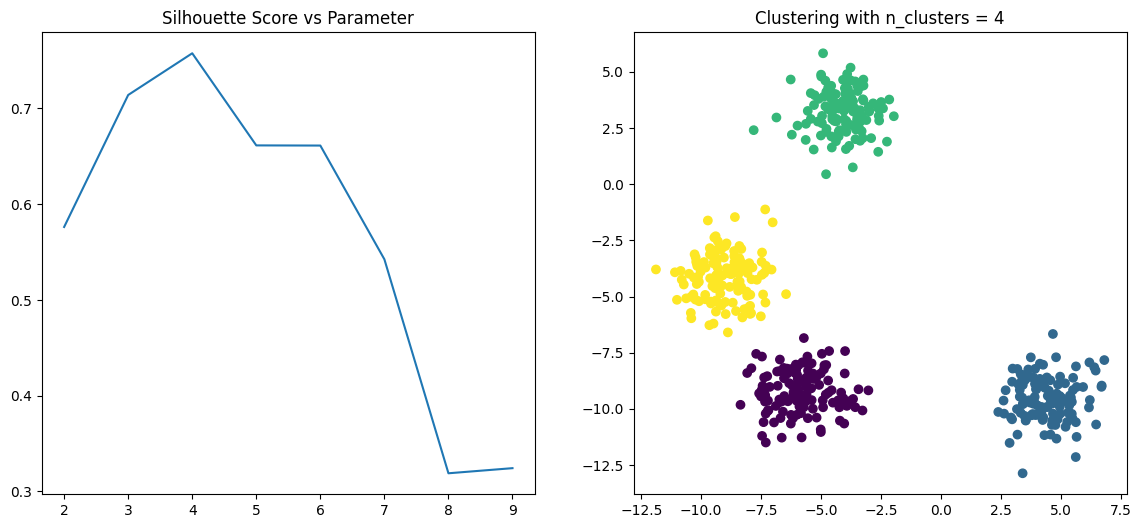

Optimizing DBSCAN


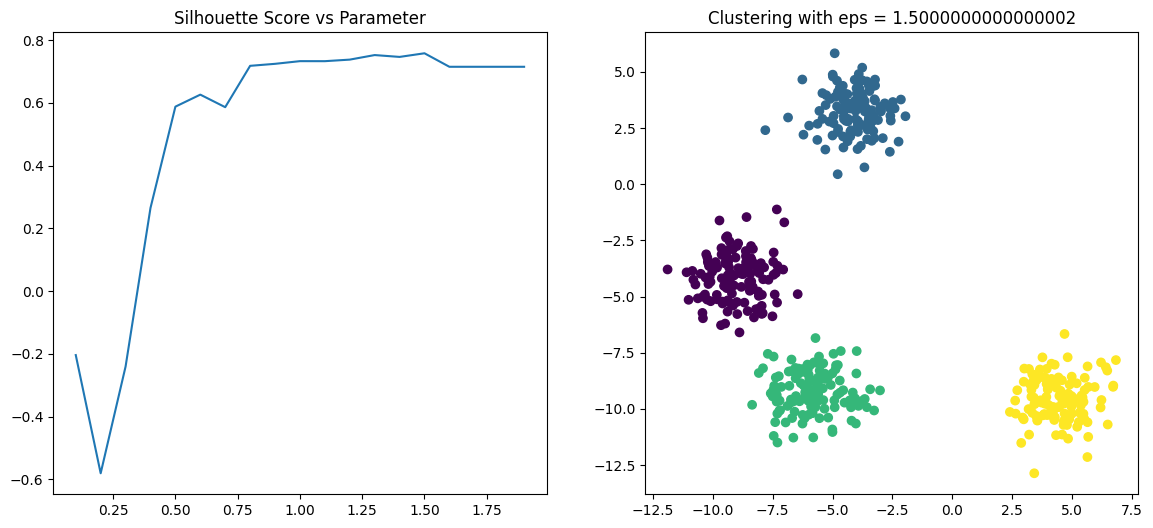

Optimizing AgglomerativeClustering


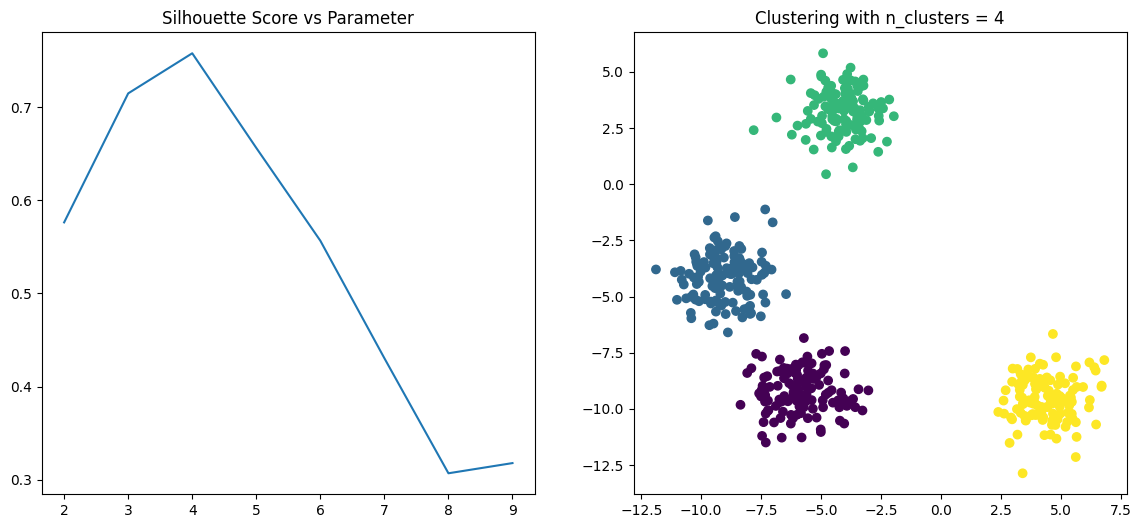

In [17]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=21)

print("Optimizing KMeans")
kmeans_params = {'n_clusters': 2, 'random_state': 21}
kmeans_best_param, kmeans_best_score = optimize_param(KMeans, kmeans_params, 'n_clusters', range(2, 10), X)

print("Optimizing DBSCAN")
dbscan_params = {'min_samples': 5}
dbscan_best_param, dbscan_best_score = optimize_param(DBSCAN, dbscan_params, 'eps', np.arange(0.1, 2.0, 0.1), X)

print("Optimizing AgglomerativeClustering")
agglo_params = {'n_clusters': 2}
agglo_best_param, agglo_best_score = optimize_param(AgglomerativeClustering, agglo_params, 'n_clusters', range(2, 10), X)